In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
x = data.iloc[:,:-1].values

In [7]:
y = data.Outcome

In [8]:
from scipy import stats
data_zscore = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [9]:
import pandas as pd

def remove_outliers(dataset,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = dataset[col].mean()
        sd = dataset[col].std()
        
        df = dataset[(dataset[col] <= mean+(n_std*sd))]
        
    return df

In [10]:
columns = data.columns
n_std = 4
data_no_outliers = remove_outliers(data_zscore, columns, n_std)

Working on column: Pregnancies
Working on column: Glucose
Working on column: BloodPressure
Working on column: SkinThickness
Working on column: Insulin
Working on column: BMI
Working on column: DiabetesPedigreeFunction
Working on column: Age
Working on column: Outcome


In [11]:
data_no_outliers.shape

(688, 9)

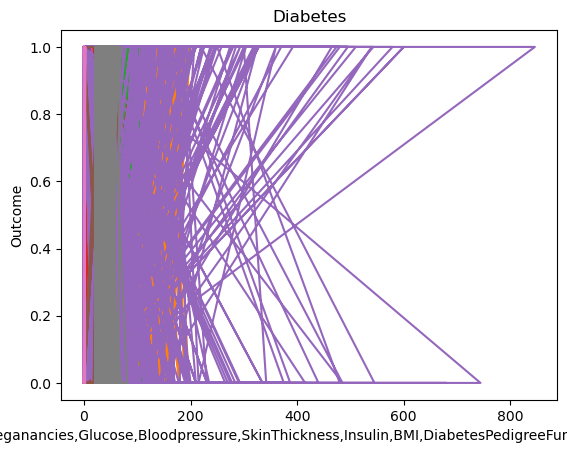

In [12]:
plt.plot(x,y)
plt.xlabel('Preganancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age')
plt.ylabel('Outcome')
plt.title('Diabetes')
plt.show()

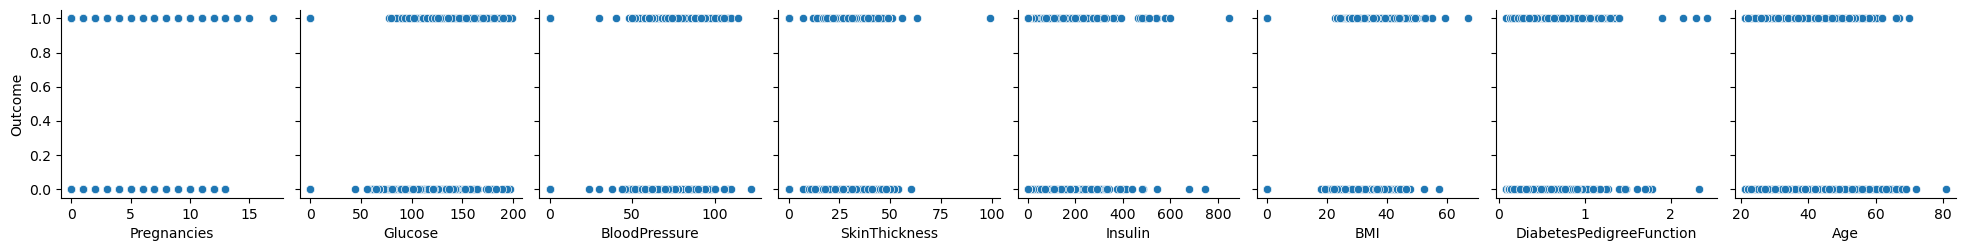

In [13]:
sns.pairplot(data,x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars ='Outcome',kind ='scatter',diag_kind = None)

In [14]:
X = data_no_outliers.iloc[:,:-1].values

In [15]:
Y = data_no_outliers.Outcome

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test,y_train,y_test  = train_test_split(X,Y,random_state = 0,train_size =0.70)

In [18]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()

In [19]:
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

In [20]:
from sklearn import linear_model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_predicted = model.predict(x_test)

In [25]:
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [26]:
x_test

array([[-0.35090424, -0.19545403,  0.07582812, ..., -0.92090628,
        -1.1888842 , -0.80923442],
       [ 1.39238802, -0.62197946,  0.21983198, ...,  0.0486854 ,
         0.79229216,  1.05200474],
       [-0.93200166, -1.13990321, -0.50018732, ..., -0.87683393,
        -0.32256335, -0.21702196],
       ...,
       [ 0.23019318,  1.3887833 , -0.64419118, ...,  0.0486854 ,
        -1.08947033,  0.62899584],
       [-0.64145295, -1.13990321, -0.57218925, ...,  1.03296786,
         1.73317341, -0.55542908],
       [ 1.68293673, -0.34778454, -0.2121796 , ..., -0.74461688,
        -1.06816736,  0.54439406]])

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(y_test,y_predicted)

In [29]:
mse

0.23671497584541062

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mae = mean_absolute_error(y_test,y_predicted)

In [32]:
mae

0.23671497584541062

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

In [34]:
mape = mean_absolute_percentage_error(y_test,y_predicted)

In [35]:
mape

348104319023806.6

In [36]:
accuracy = 100 - mape

In [37]:
accuracy

-348104319023706.6

In [38]:
from sklearn.metrics import  confusion_matrix, accuracy_score

In [39]:
accuracy = accuracy_score(y_test,y_predicted)
print('accuracy :',accuracy*100)

accuracy : 76.32850241545893


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [41]:
cm

array([[118,  16],
       [ 33,  40]], dtype=int64)